# Clustering

K-Means

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

In [12]:
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [13]:
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [15]:
y_pred is kmeans.labels_

True

In [16]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

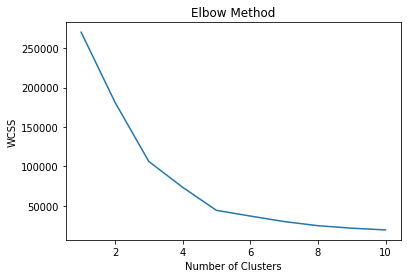

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

.

In [19]:
k_means = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(X)

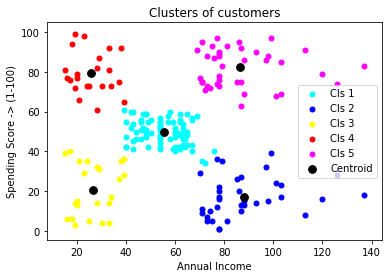

In [20]:
size = 25
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = size, c = 'cyan', label = 'Cls 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = size, c = 'blue', label = 'Cls 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = size, c = 'yellow', label = 'Cls 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = size, c = 'red', label = 'Cls 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = size, c = 'magenta', label = 'Cls 5')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score -> (1-100)')
plt.legend()
plt.show()

# Silhoutte index

In [21]:
from sklearn.metrics import silhouette_score

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (i, silhouette_score(X,labels))

2 0.29936152451888626
3 0.46761358158775435
4 0.4931963109249047
5 0.553931997444648
6 0.5367558067779578
7 0.5270287298101395
8 0.45704384633565154
9 0.44585747117541175
10 0.4476097999437432


# calinski harabaz score

In [22]:
from sklearn.metrics import calinski_harabasz_score

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (i, calinski_harabasz_score(X,labels))

2 96.74654578369159
3 151.5570090006799
4 174.0644335433684
5 247.35899338037288
6 242.5376443336707
7 255.13354799708523
8 268.4478375816554
9 271.4391462664024
10 266.7916157587179
11 266.92564348315915
12 272.1498977509751
13 273.883234319786
14 288.05670970196036
15 280.17128747264644
16 287.7780253869599
17 282.3711342766418
18 285.6977351876908
19 296.65471751532357


# Hierarchial Clustering

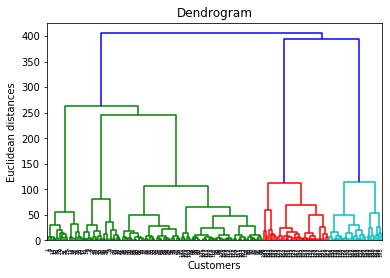

In [23]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

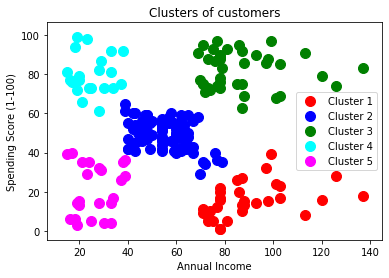

In [26]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=15).fit(X)
labels = db.labels_
print(labels)

[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  3  1  3  1  3  2  3  2  3  1  3  2  3  2  3  2  3  2  3  1  3
  2  3  1  3  2  3  2  3  2  3  2  3  2  3  2  3  1  3  2  3  2  3  2  3
  2 -1  2  3  2  3  2  3  2  3  2  3 -1  3  2  3 -1  3 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


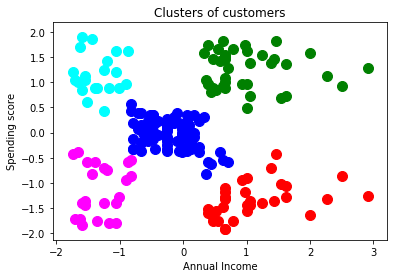

In [30]:
y_kmeans = labels
size = 25
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()